In [13]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [14]:
# Define data transformations
train_transforms = transforms.Compose([
    transforms.Resize((100, 100)),
    transforms.ToTensor(),
])

val_transforms = transforms.Compose([
    transforms.Resize((100, 100)),
    transforms.ToTensor(),
])

# Load the dataset
train_dataset = datasets.ImageFolder(root='melanoma_cancer_dataset/train', transform=train_transforms)
val_dataset = datasets.ImageFolder(root='melanoma_cancer_dataset/test', transform=val_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [15]:
# Initialize an empty array for storing flattened images
flattened_images = []

# Loop through the DataLoader to access batches of images
for images, _ in train_loader:
    # Flatten each image in the batch and convert it to numpy
    for image in images:
        flattened_images.append(image.numpy().flatten())

# Convert the list of flattened images to a numpy array
data = np.array(flattened_images)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


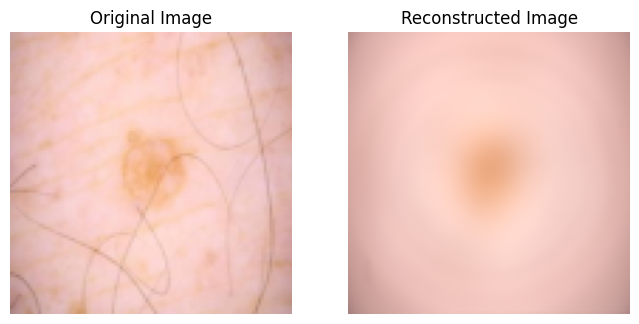

In [16]:
# Assuming 'data' contains the flattened images and 'train_loader' is the DataLoader

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply PCA with 66 components
pca = PCA(n_components=66)
data_transformed = pca.fit_transform(data_scaled)

# Reconstruct the images from the PCA components
data_reconstructed = pca.inverse_transform(data_transformed)
data_reconstructed = scaler.inverse_transform(data_reconstructed)

# Now we will write a function to visualize an image at a given index
def visualize_images(index):
    # Fetch the original image
    original_image = next(iter(train_loader))[0][index].numpy()
    original_image = np.transpose(original_image, (1, 2, 0))  # PyTorch tensors are (C, H, W)

    # Fetch the reconstructed image
    reconstructed_image = data_reconstructed[index].reshape(3, 100, 100)
    reconstructed_image = np.transpose(reconstructed_image, (1, 2, 0))  # Reshape to (H, W, C)

    # Plot the original and reconstructed images
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    axes[0].imshow(original_image)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(reconstructed_image)
    axes[1].set_title('Reconstructed Image')
    axes[1].axis('off')

    plt.show()

# Visualize the first image and its reconstruction
visualize_images(1)

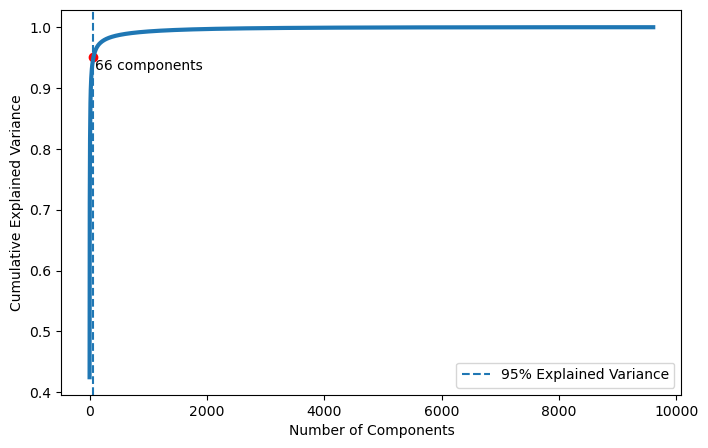

In [14]:
# Fit PCA on the flattened image data
pca = PCA().fit(data)

# Calculate cumulative sum of explained variance ratios
cumsum = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components to explain 95% of variance
d = np.argmax(cumsum >= 0.95) + 1

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(cumsum, linewidth=3)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axvline(x=d, linestyle='--', label='95% Explained Variance')

# Mark the intersection point
plt.scatter(d, cumsum[d-1], color='red')
# Annotate the intersection point
plt.annotate(f'{d} components',  # Text to display
             xy=(d, cumsum[d-1]),  # Point to annotate
             xytext=(d+20, cumsum[d-1]-0.02),  # Position of text
             )

plt.legend()
plt.show()

In [15]:
# Assume `data` is your dataset
pca = PCA(n_components=66)
pca_features = pca.fit_transform(data)

    Principal Component  Explained Variance Ratio  \
0                     1                  0.424536   
1                     2                  0.154712   
2                     3                  0.084893   
3                     4                  0.046050   
4                     5                  0.031289   
..                  ...                       ...   
61                   62                  0.000544   
62                   63                  0.000510   
63                   64                  0.000499   
64                   65                  0.000494   
65                   66                  0.000474   

    Cumulative Explained Variance  
0                        0.424536  
1                        0.579248  
2                        0.664140  
3                        0.710191  
4                        0.741480  
..                            ...  
61                       0.948353  
62                       0.948863  
63                       0.949362  
64 

Text(0.5, 1.0, 'Explained variance by component')

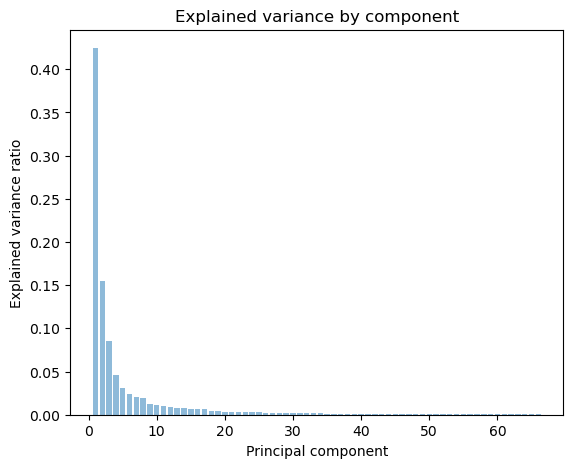

In [19]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

pca_summary_df = pd.DataFrame({
    'Principal Component': range(1, len(explained_variance_ratio) + 1),
    'Explained Variance Ratio': explained_variance_ratio,
    'Cumulative Explained Variance': cumulative_explained_variance
})

print(pca_summary_df)

plt.figure(figsize=(14, 5))

# Subplot 1: Explained variance by each component
plt.subplot(1, 2, 1)
plt.bar(range(1, 67), explained_variance_ratio, alpha=0.5, label='Individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component')
plt.title('Explained variance by component')